<a href="https://colab.research.google.com/github/srinathchowdary11/Advanced-Machine-Learning/blob/main/Final/AML_Final_Hand_Alphabets_Sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advance Machine Learning Project
**Hand Alphabets Sign Detection**

**Importing all the required libraies**

In [9]:
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping

**Creating a function for Ploting the History of this Model**

In [10]:
def graph_display(history):  #I have created the function for called graph_display for ploting the history
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(acc)), acc, label='Train Acc')
    plt.plot(range(len(val_acc)), val_acc, label='Val_Acc')
    plt.legend(loc='lower right')
    plt.title('Train & Val--Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(range(len(loss)), loss, label='Train Loss')
    plt.plot(range(len(val_loss)), val_loss, label='Val Loss')
    plt.legend(loc='upper right')
    plt.title('Train & val -- Loss')
    plt.show()

Importing Hand Sign Zip file from Local

In [8]:
from google.colab import files
files.upload()

Saving archive (1).zip to archive (1).zip


Instiallizing the Train and Test Folders

In [3]:
# prompt: Download dataset from kaggle

!kaggle datasets download -d ash2703/handsignimages


Dataset URL: https://www.kaggle.com/datasets/ash2703/handsignimages
License(s): DbCL-1.0
handsignimages.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip -qq handsignimages.zip

In [11]:
Bt_size = 32
height = 48 #48
width = 48 #48
epoch = 25
train_dir = ("/content/Train")
test_dir = ("/content/Test")
time_record = {}
time_acc = {}
time_par = {}

In [12]:
trn_path = tf.keras.utils.image_dataset_from_directory(
  train_dir ,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(height, width),
  batch_size=Bt_size)

val_path = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(height, width),
  batch_size=Bt_size)

name_train = trn_path.class_names

Found 27455 files belonging to 24 classes.
Using 21964 files for training.
Found 7172 files belonging to 24 classes.
Using 1434 files for validation.


In [13]:
import os
for name in os.listdir('/content/Train'):
    count=[]
    for name_class in os.listdir('/content/Train'+'/'+name):
        count.append(name_class)
    print("Class name:",name,len(count))

Class name: F 1204
Class name: B 1010
Class name: L 1241
Class name: I 1162
Class name: R 1294
Class name: T 1186
Class name: K 1114
Class name: C 1144
Class name: Y 1118
Class name: S 1199
Class name: Q 1279
Class name: H 1013
Class name: X 1164
Class name: O 1196
Class name: D 1196
Class name: G 1090
Class name: M 1055
Class name: W 1225
Class name: V 1082
Class name: E 957
Class name: N 1151
Class name: A 1126
Class name: U 1161
Class name: P 1088


In [14]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

def func(path):
# Load the input image
    img = load_img(path)

    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    # Configure the ImageDataGenerator
    datagen = ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.15,
            height_shift_range=0.15,
            shear_range=0.1,
            horizontal_flip=True,
            fill_mode='nearest')

    # Generate 10 augmented images
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                            save_to_dir='/content/drive/MyDrive/Images/Train/update_disgust',
                            save_prefix='aug_image',
                            save_format='jpg'):
        i += 1
        if i > 9:
            break

In [15]:
for name in os.listdir('/content/Train'):
    count=[]
    for name_class in os.listdir('/content/Train'+'/'+name):
        count.append(name_class)
    print("Class name:",name,len(count))

Class name: F 1204
Class name: B 1010
Class name: L 1241
Class name: I 1162
Class name: R 1294
Class name: T 1186
Class name: K 1114
Class name: C 1144
Class name: Y 1118
Class name: S 1199
Class name: Q 1279
Class name: H 1013
Class name: X 1164
Class name: O 1196
Class name: D 1196
Class name: G 1090
Class name: M 1055
Class name: W 1225
Class name: V 1082
Class name: E 957
Class name: N 1151
Class name: A 1126
Class name: U 1161
Class name: P 1088


Image Output Hand Signs

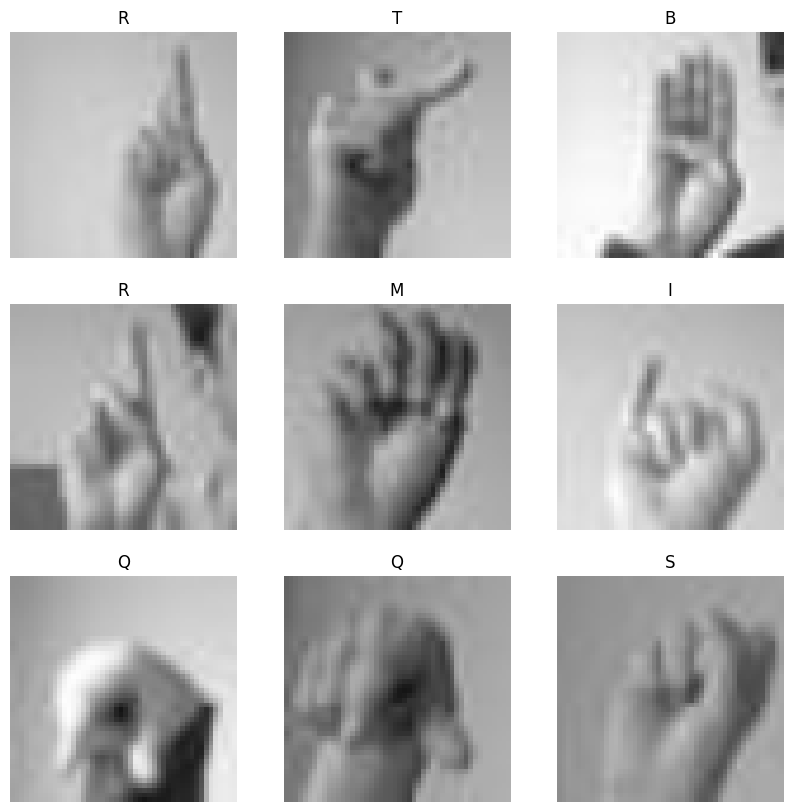

In [17]:
from pathlib import Path
import imghdr
plt.figure(figsize=(10, 10))
for images, labels in trn_path.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint32"))
    plt.title(name_train[labels[i]])
    plt.axis("off")

**CNN Model **

Validating Accuracy when dropout is 0.25 epoch 25

In [18]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(height, width, 3)),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(name_train))
])
## I have Used ADAM as the Optimizer
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 48, 48, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        1

In [19]:
start = time()

history = model.fit(
  trn_path,
  validation_data=val_path,
  epochs=epoch
)

end = time()

elapsed_time = end - start

print(f"Elapsed Time:{elapsed_time}s")


time_par["Base"] = 548258
time_record["Base"] = elapsed_time
time_acc["Base"] = history.history["val_acc"][-1]

Epoch 1/25
687/687 [==============================] - 16s 13ms/step - loss: 0.5689 - acc: 0.8304 - val_loss: 0.2124 - val_acc: 0.9247
Epoch 2/25
687/687 [==============================] - 7s 10ms/step - loss: 0.0211 - acc: 0.9946 - val_loss: 0.2229 - val_acc: 0.9463
Epoch 3/25
687/687 [==============================] - 7s 10ms/step - loss: 0.0474 - acc: 0.9845 - val_loss: 0.6001 - val_acc: 0.8529
Epoch 4/25
687/687 [==============================] - 7s 10ms/step - loss: 0.0208 - acc: 0.9938 - val_loss: 0.3191 - val_acc: 0.9338
Epoch 5/25
687/687 [==============================] - 6s 9ms/step - loss: 0.0285 - acc: 0.9919 - val_loss: 3.8509 - val_acc: 0.6646
Epoch 6/25
687/687 [==============================] - 6s 9ms/step - loss: 0.0189 - acc: 0.9946 - val_loss: 0.2266 - val_acc: 0.9393
Epoch 7/25
687/687 [==============================] - 7s 11ms/step - loss: 0.0125 - acc: 0.9957 - val_loss: 0.3442 - val_acc: 0.9379
Epoch 8/25
687/687 [==============================] - 6s 9ms/step - lo

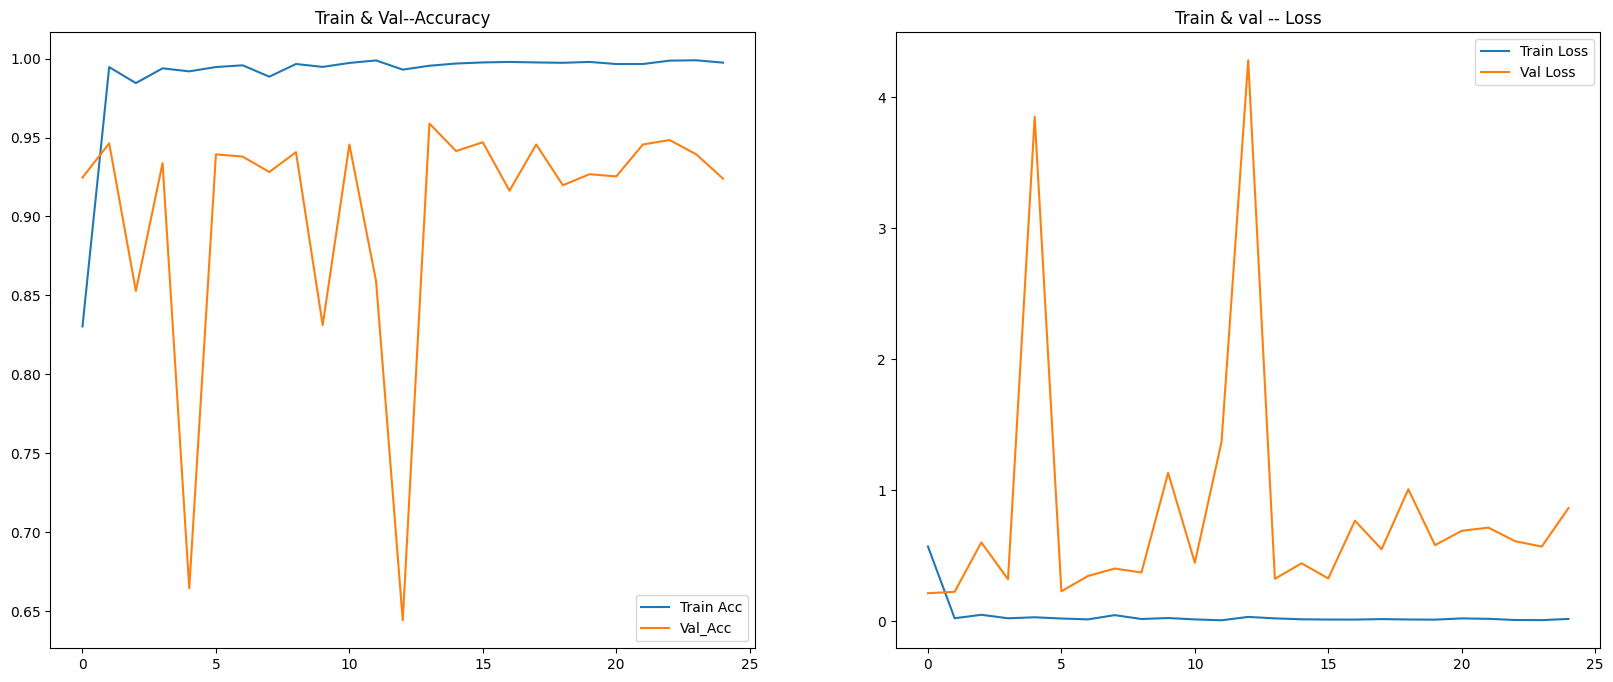

In [20]:
graph_display(history)

In [21]:
validation_loss, validation_accuracy = model.evaluate(val_path)
print(f"Validation Accuracy: {validation_accuracy:.2%}")
time_acc["Validation"] = validation_accuracy

45/45 [==============================] - 0s 5ms/step - loss: 0.8621 - acc: 0.9240
Validation Accuracy: 92.40%


Validating Accuracy when dropout is 0.64 epoch 25

In [22]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(height, width, 3)),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.64),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.64),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.64),

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(name_train))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 48, 48, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 batch_normalization_3 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)       

In [23]:
start = time()

history = model.fit(
  trn_path,
  validation_data=val_path,
  epochs=epoch
)

end = time()

elapsed_time = end - start

print(f"Elapsed Time:{elapsed_time}s")


time_par["Base"] = 548258
time_record["Base"] = elapsed_time
time_acc["Base"] = history.history["val_acc"][-1]

Epoch 1/25
687/687 [==============================] - 11s 13ms/step - loss: 1.6408 - acc: 0.4924 - val_loss: 1.1094 - val_acc: 0.6715
Epoch 2/25
687/687 [==============================] - 6s 9ms/step - loss: 0.3319 - acc: 0.8829 - val_loss: 0.5018 - val_acc: 0.8543
Epoch 3/25
687/687 [==============================] - 6s 9ms/step - loss: 0.1477 - acc: 0.9480 - val_loss: 0.3728 - val_acc: 0.9017
Epoch 4/25
687/687 [==============================] - 8s 12ms/step - loss: 0.1060 - acc: 0.9648 - val_loss: 0.2750 - val_acc: 0.9240
Epoch 5/25
687/687 [==============================] - 7s 9ms/step - loss: 0.0874 - acc: 0.9712 - val_loss: 0.4888 - val_acc: 0.8940
Epoch 6/25
687/687 [==============================] - 9s 12ms/step - loss: 0.0732 - acc: 0.9755 - val_loss: 0.3313 - val_acc: 0.9247
Epoch 7/25
687/687 [==============================] - 6s 9ms/step - loss: 0.0690 - acc: 0.9785 - val_loss: 0.4937 - val_acc: 0.9156
Epoch 8/25
687/687 [==============================] - 9s 13ms/step - los

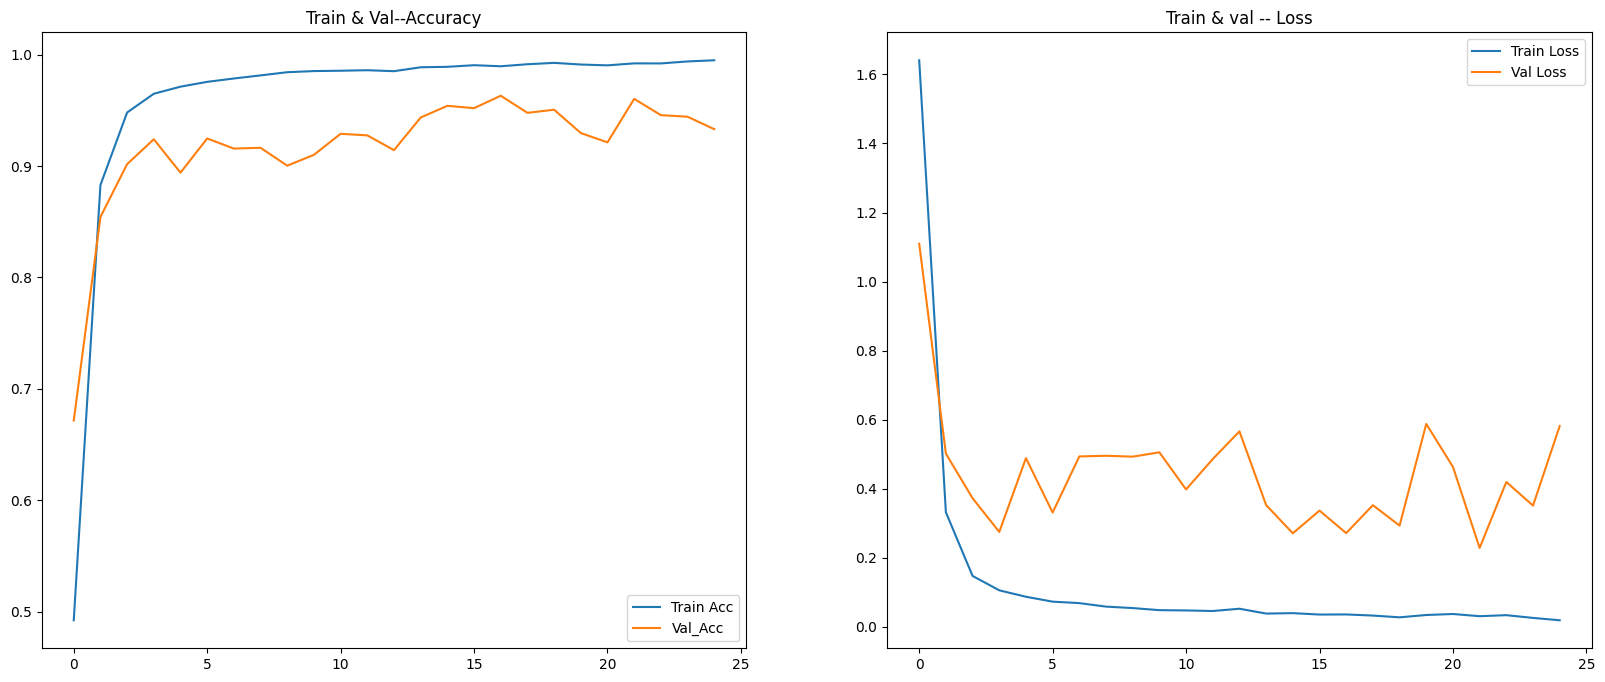

In [24]:
graph_display(history)

In [25]:
validation_loss, validation_accuracy = model.evaluate(val_path)
print(f"Validation Accuracy: {validation_accuracy:.2%}")
time_acc["Validation"] = validation_accuracy

45/45 [==============================] - 0s 5ms/step - loss: 0.5817 - acc: 0.9331
Validation Accuracy: 93.31%


Validating Accuracy when dropout is 0.5 epoch 25

In [26]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(height, width, 3)),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(name_train))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 48, 48, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 batch_normalization_6 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)       

In [27]:
start = time()

history = model.fit(
  trn_path,
  validation_data=val_path,
  epochs=epoch
)

end = time()

elapsed_time = end - start

print(f"Elapsed Time:{elapsed_time}s")


time_par["Base"] = 548258
time_record["Base"] = elapsed_time
time_acc["Base"] = history.history["val_acc"][-1]

Epoch 1/25
687/687 [==============================] - 10s 11ms/step - loss: 1.0696 - acc: 0.6674 - val_loss: 0.5554 - val_acc: 0.8194
Epoch 2/25
687/687 [==============================] - 6s 9ms/step - loss: 0.1281 - acc: 0.9551 - val_loss: 0.2604 - val_acc: 0.9184
Epoch 3/25
687/687 [==============================] - 8s 11ms/step - loss: 0.0699 - acc: 0.9758 - val_loss: 0.4075 - val_acc: 0.8759
Epoch 4/25
687/687 [==============================] - 6s 9ms/step - loss: 0.0424 - acc: 0.9851 - val_loss: 0.2463 - val_acc: 0.9289
Epoch 5/25
687/687 [==============================] - 7s 11ms/step - loss: 0.0424 - acc: 0.9866 - val_loss: 0.4413 - val_acc: 0.8975
Epoch 6/25
687/687 [==============================] - 9s 13ms/step - loss: 0.0380 - acc: 0.9863 - val_loss: 0.4387 - val_acc: 0.8940
Epoch 7/25
687/687 [==============================] - 6s 9ms/step - loss: 0.0334 - acc: 0.9890 - val_loss: 0.2833 - val_acc: 0.9379
Epoch 8/25
687/687 [==============================] - 8s 11ms/step - lo

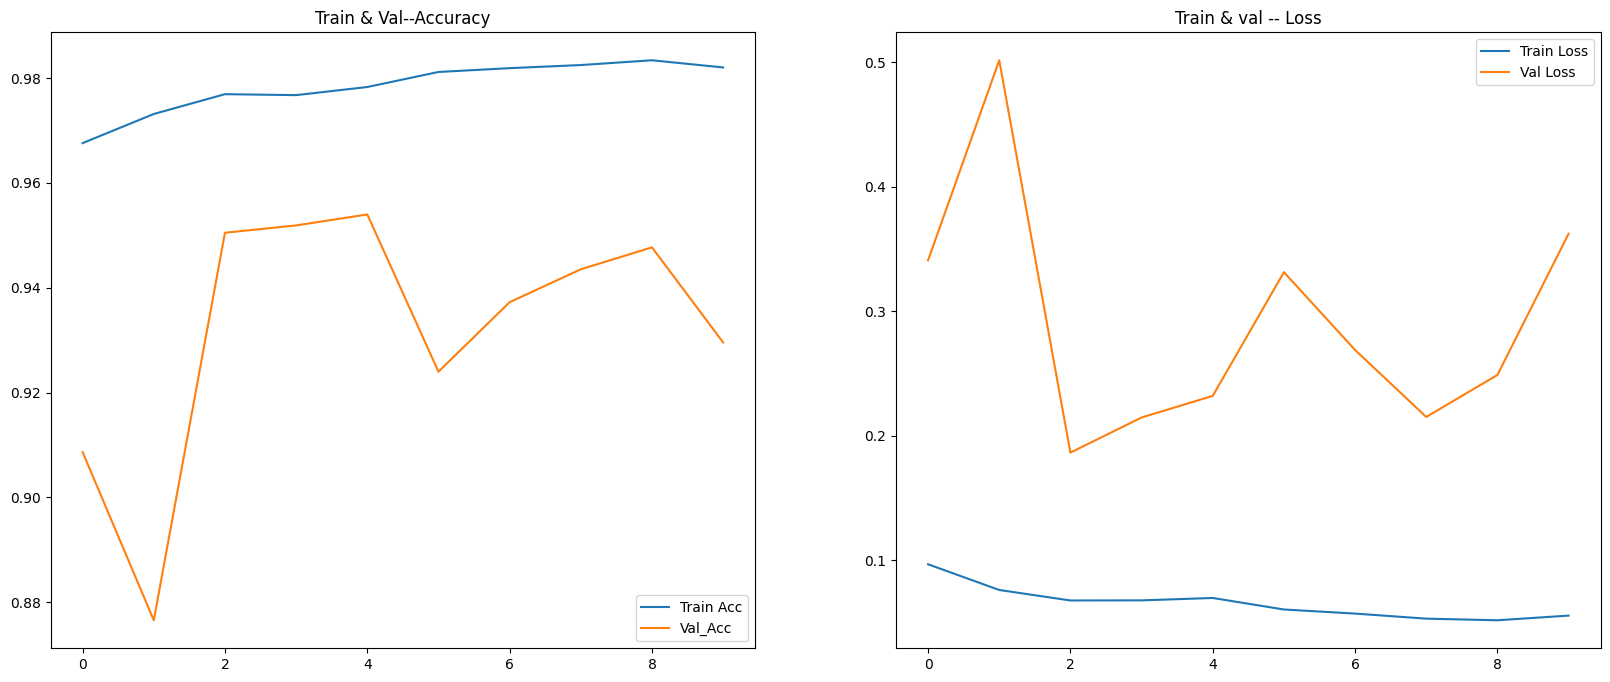

In [33]:
graph_display(history)

In [19]:
validation_loss, validation_accuracy = model.evaluate(val_path)
print(f"Validation Accuracy: {validation_accuracy:.2%}")
time_acc["Validation"] = validation_accuracy

45/45 [==============================] - 0s 5ms/step - loss: 0.2904 - acc: 0.9568
Validation Accuracy: 95.68%


Validating Accuracy when dropout is 0.5 epoch 10

In [28]:
start = time()

# Specify the number of epochs you want
num_epochs = 10  # Change this value to the desired number of epochs

history = model.fit(
  trn_path,
  validation_data=val_path,
  epochs=num_epochs  # Change 'epoch' to 'num_epochs'
)

end = time()

elapsed_time = end - start

print(f"Elapsed Time:{elapsed_time}s")

time_par["Base"] = 548258
time_record["Base"] = elapsed_time
time_acc["Base"] = history.history["val_acc"][-1]

Epoch 1/10
687/687 [==============================] - 7s 10ms/step - loss: 0.0245 - acc: 0.9951 - val_loss: 0.6261 - val_acc: 0.9324
Epoch 2/10
687/687 [==============================] - 7s 11ms/step - loss: 0.0238 - acc: 0.9955 - val_loss: 0.9716 - val_acc: 0.9073
Epoch 3/10
687/687 [==============================] - 7s 11ms/step - loss: 0.0143 - acc: 0.9969 - val_loss: 0.6820 - val_acc: 0.9331
Epoch 4/10
687/687 [==============================] - 7s 10ms/step - loss: 0.0118 - acc: 0.9975 - val_loss: 0.5711 - val_acc: 0.9198
Epoch 5/10
687/687 [==============================] - 6s 9ms/step - loss: 0.0148 - acc: 0.9968 - val_loss: 0.5326 - val_acc: 0.9442
Epoch 6/10
687/687 [==============================] - 8s 12ms/step - loss: 0.0152 - acc: 0.9968 - val_loss: 0.5495 - val_acc: 0.9324
Epoch 7/10
687/687 [==============================] - 6s 9ms/step - loss: 0.0190 - acc: 0.9964 - val_loss: 0.5945 - val_acc: 0.9379
Epoch 8/10
687/687 [==============================] - 8s 12ms/step - lo

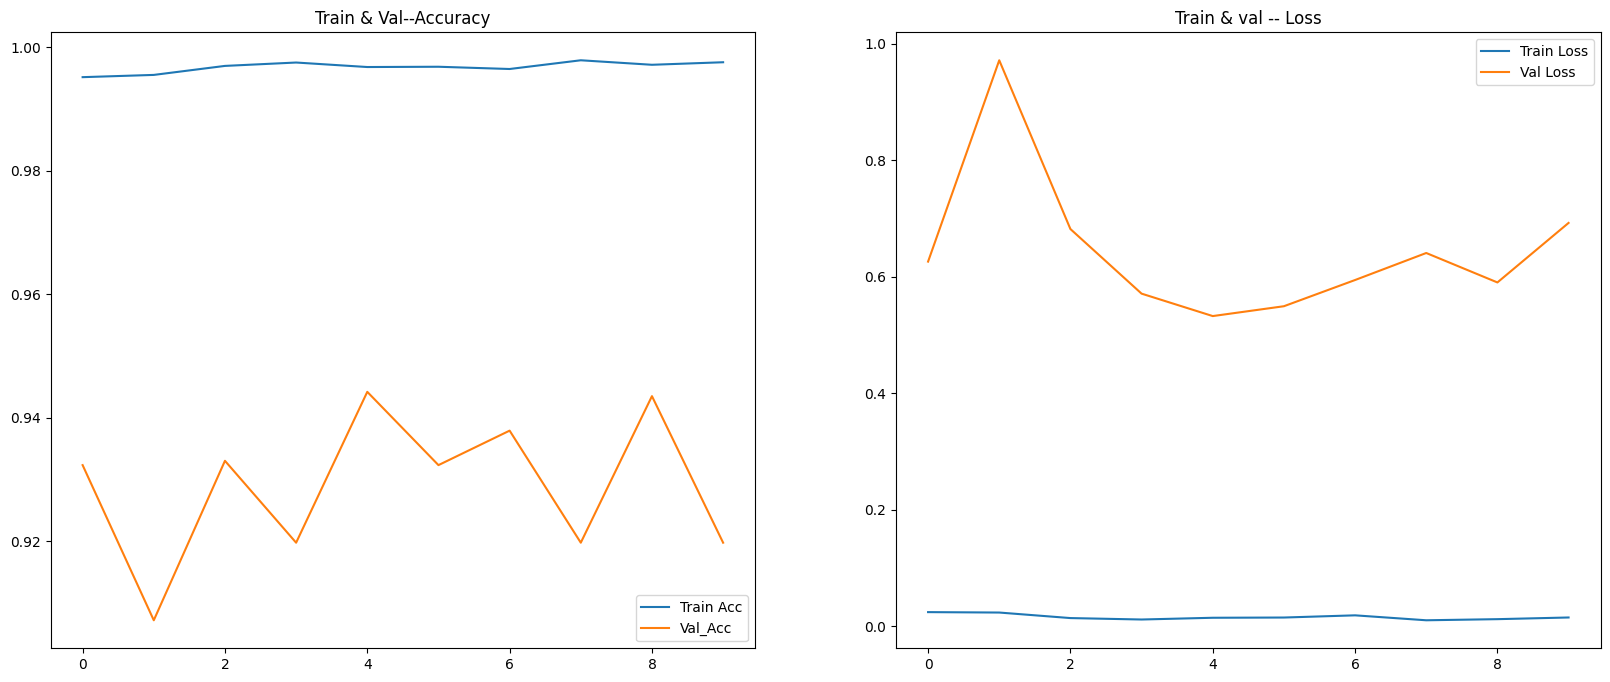

In [29]:
graph_display(history)

In [30]:
validation_loss, validation_accuracy = model.evaluate(val_path)
print(f"Validation Accuracy: {validation_accuracy:.2%}")
time_acc["Validation"] = validation_accuracy

45/45 [==============================] - 0s 5ms/step - loss: 0.6925 - acc: 0.9198
Validation Accuracy: 91.98%


Validation accuracy when droupout is 0.8, epocs are 15 and when filters are reduced

In [31]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(height, width, 3)),

  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.8),

  layers.Conv2D(24, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.8),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.8),

  layers.Flatten(),
  layers.Dense(32, activation='relu'),
  layers.Dense(len(name_train))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 48, 48, 3)         0         
                                                                 
 conv2d_9 (Conv2D)           (None, 48, 48, 16)        448       
                                                                 
 batch_normalization_9 (Bat  (None, 48, 48, 16)        64        
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 24, 24, 16)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 24, 24, 16)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 24)       

In [32]:
start = time()

# Specify the number of epochs you want
num_epochs = 15  # Change this value to the desired number of epochs

history = model.fit(
  trn_path,
  validation_data=val_path,
  epochs=num_epochs  # Change 'epoch' to 'num_epochs'
)

end = time()

elapsed_time = end - start

print(f"Elapsed Time:{elapsed_time}s")

time_par["Base"] = 548258
time_record["Base"] = elapsed_time
time_acc["Base"] = history.history["val_acc"][-1]

Epoch 1/15
687/687 [==============================] - 11s 12ms/step - loss: 3.2754 - acc: 0.0468 - val_loss: 8.6235 - val_acc: 0.0425
Epoch 2/15
687/687 [==============================] - 7s 10ms/step - loss: 3.0386 - acc: 0.0913 - val_loss: 4.0453 - val_acc: 0.1555
Epoch 3/15
687/687 [==============================] - 8s 12ms/step - loss: 2.3266 - acc: 0.2662 - val_loss: 2.4245 - val_acc: 0.3550
Epoch 4/15
687/687 [==============================] - 6s 9ms/step - loss: 1.6843 - acc: 0.4461 - val_loss: 1.7823 - val_acc: 0.4672
Epoch 5/15
687/687 [==============================] - 8s 11ms/step - loss: 1.3268 - acc: 0.5564 - val_loss: 1.5465 - val_acc: 0.5377
Epoch 6/15
687/687 [==============================] - 7s 10ms/step - loss: 1.1105 - acc: 0.6148 - val_loss: 0.9372 - val_acc: 0.7043
Epoch 7/15
687/687 [==============================] - 7s 10ms/step - loss: 0.9913 - acc: 0.6545 - val_loss: 0.8068 - val_acc: 0.7322
Epoch 8/15
687/687 [==============================] - 6s 8ms/step - l

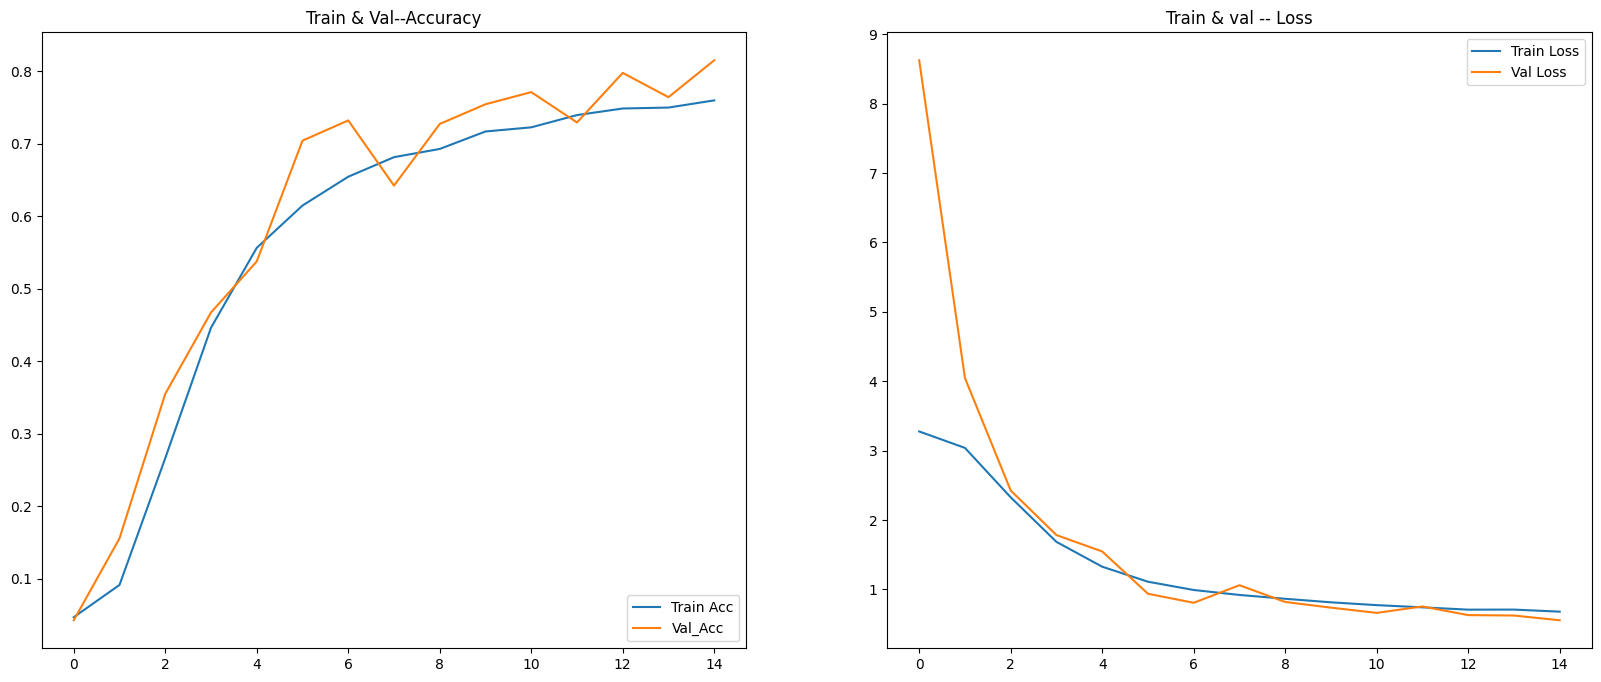

In [33]:
graph_display(history)

In [34]:
validation_loss, validation_accuracy = model.evaluate(val_path)
print(f"Validation Accuracy: {validation_accuracy:.2%}")
time_acc["Validation"] = validation_accuracy

45/45 [==============================] - 0s 8ms/step - loss: 0.5549 - acc: 0.8152
Validation Accuracy: 81.52%


Validation accuracy when droupout is 0.32, epocs are 20

In [35]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(height, width, 3)),

  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.32),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.32),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.32),

  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(len(name_train))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 48, 48, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (None, 48, 48, 16)        448       
                                                                 
 batch_normalization_12 (Ba  (None, 48, 48, 16)        64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 24, 24, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_12 (Dropout)        (None, 24, 24, 16)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 32)       

In [36]:
start = time()

# Specify the number of epochs you want
num_epochs = 20  # Change this value to the desired number of epochs

history = model.fit(
  trn_path,
  validation_data=val_path,
  epochs=num_epochs  # Change 'epoch' to 'num_epochs'
)

end = time()

elapsed_time = end - start

print(f"Elapsed Time:{elapsed_time}s")

time_par["Base"] = 548258
time_record["Base"] = elapsed_time
time_acc["Base"] = history.history["val_acc"][-1]

Epoch 1/20
687/687 [==============================] - 11s 13ms/step - loss: 1.2080 - acc: 0.6233 - val_loss: 0.4419 - val_acc: 0.8654
Epoch 2/20
687/687 [==============================] - 6s 8ms/step - loss: 0.1067 - acc: 0.9651 - val_loss: 0.3296 - val_acc: 0.9086
Epoch 3/20
687/687 [==============================] - 8s 11ms/step - loss: 0.0367 - acc: 0.9879 - val_loss: 0.5343 - val_acc: 0.8612
Epoch 4/20
687/687 [==============================] - 6s 8ms/step - loss: 0.0315 - acc: 0.9894 - val_loss: 0.5438 - val_acc: 0.8494
Epoch 5/20
687/687 [==============================] - 8s 12ms/step - loss: 0.0259 - acc: 0.9916 - val_loss: 0.3251 - val_acc: 0.9317
Epoch 6/20
687/687 [==============================] - 6s 9ms/step - loss: 0.0215 - acc: 0.9929 - val_loss: 0.4019 - val_acc: 0.9275
Epoch 7/20
687/687 [==============================] - 8s 12ms/step - loss: 0.0207 - acc: 0.9934 - val_loss: 0.3712 - val_acc: 0.9066
Epoch 8/20
687/687 [==============================] - 6s 8ms/step - los

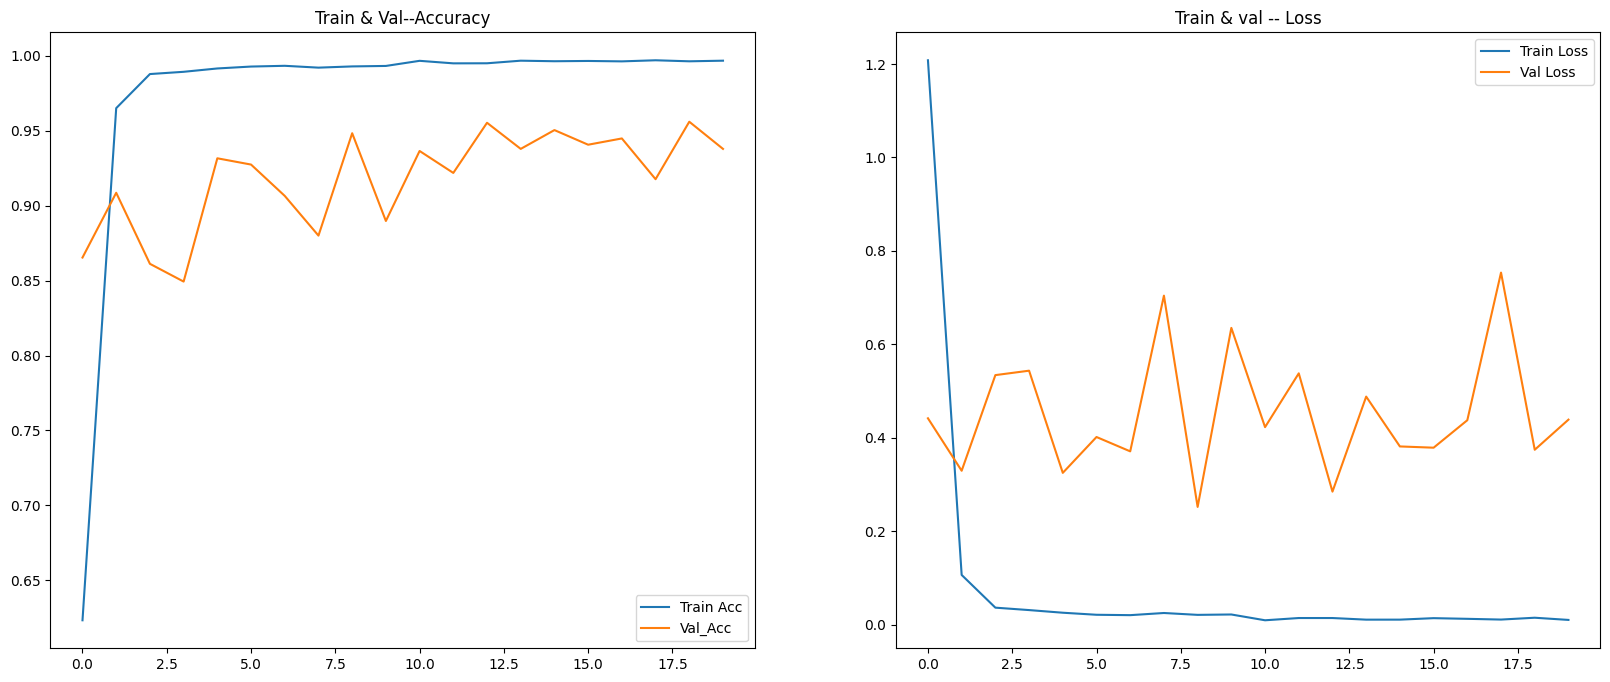

In [37]:
graph_display(history)

In [38]:
validation_loss, validation_accuracy = model.evaluate(val_path)
print(f"Validation Accuracy: {validation_accuracy:.2%}")
time_acc["Validation"] = validation_accuracy

45/45 [==============================] - 0s 8ms/step - loss: 0.4390 - acc: 0.9379
Validation Accuracy: 93.79%


Validation accuracy when droupout is 0.32, epocs are 10

In [39]:
start = time()

# Specify the number of epochs you want
num_epochs = 10  # Change this value to the desired number of epochs

history = model.fit(
  trn_path,
  validation_data=val_path,
  epochs=num_epochs  # Change 'epoch' to 'num_epochs'
)

end = time()

elapsed_time = end - start

print(f"Elapsed Time:{elapsed_time}s")

time_par["Base"] = 548258
time_record["Base"] = elapsed_time
time_acc["Base"] = history.history["val_acc"][-1]

Epoch 1/10
687/687 [==============================] - 7s 10ms/step - loss: 0.0100 - acc: 0.9974 - val_loss: 0.5633 - val_acc: 0.9338
Epoch 2/10
687/687 [==============================] - 6s 8ms/step - loss: 0.0095 - acc: 0.9976 - val_loss: 0.6286 - val_acc: 0.9331
Epoch 3/10
687/687 [==============================] - 8s 12ms/step - loss: 0.0040 - acc: 0.9987 - val_loss: 0.5952 - val_acc: 0.9400
Epoch 4/10
687/687 [==============================] - 6s 8ms/step - loss: 0.0111 - acc: 0.9968 - val_loss: 0.4676 - val_acc: 0.9519
Epoch 5/10
687/687 [==============================] - 8s 12ms/step - loss: 0.0147 - acc: 0.9960 - val_loss: 0.4393 - val_acc: 0.9561
Epoch 6/10
687/687 [==============================] - 6s 8ms/step - loss: 0.0099 - acc: 0.9978 - val_loss: 0.9208 - val_acc: 0.9107
Epoch 7/10
687/687 [==============================] - 8s 11ms/step - loss: 0.0103 - acc: 0.9974 - val_loss: 0.4432 - val_acc: 0.9372
Epoch 8/10
687/687 [==============================] - 6s 8ms/step - loss

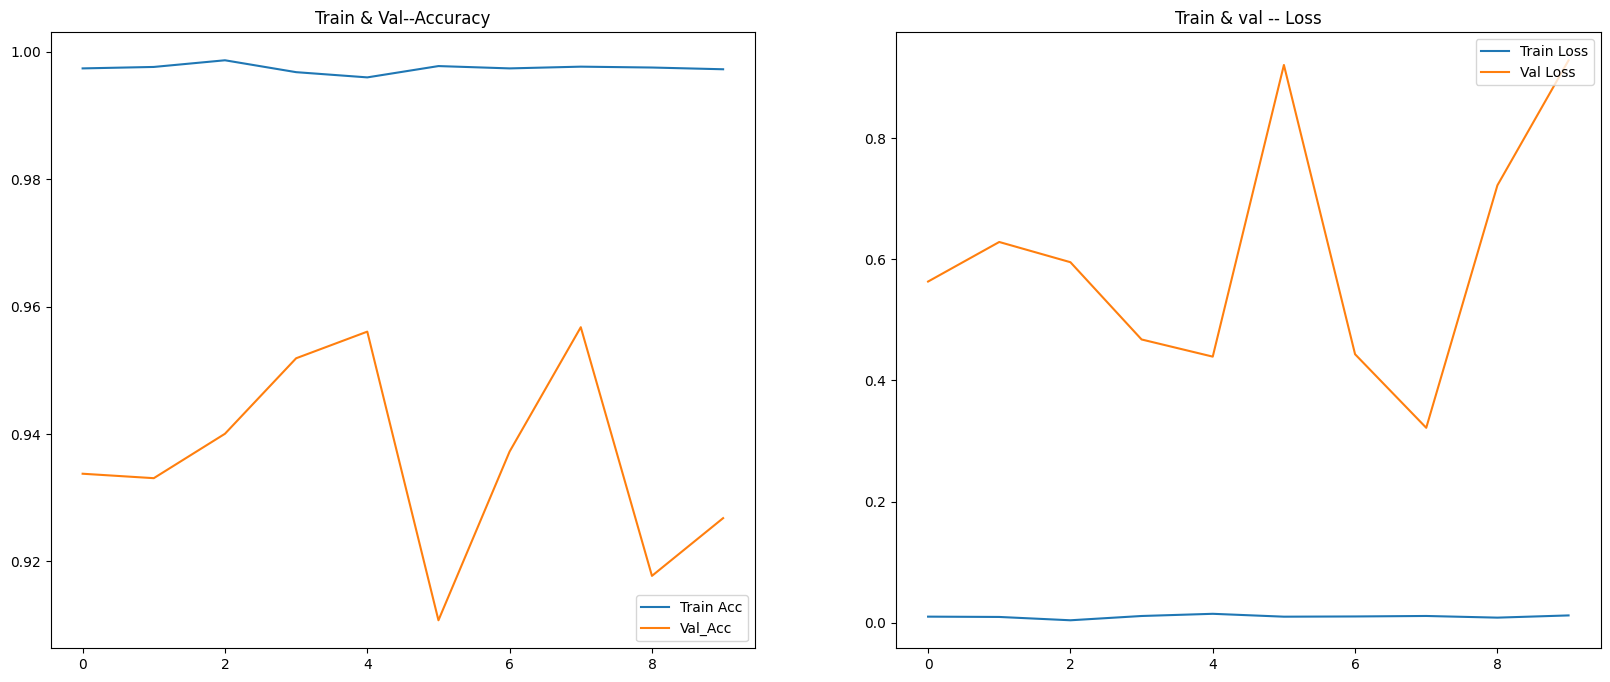

In [40]:
graph_display(history)

In [42]:
validation_loss, validation_accuracy = model.evaluate(val_path)
print(f"Validation Accuracy: {validation_accuracy:.2%}")
time_acc["Validation"] = validation_accuracy

45/45 [==============================] - 0s 5ms/step - loss: 0.9286 - acc: 0.9268
Validation Accuracy: 92.68%


**Implementing the Confusion matrix to know the correlation between different Hand signs**

1/1 [==============================] - 0s 112ms/step


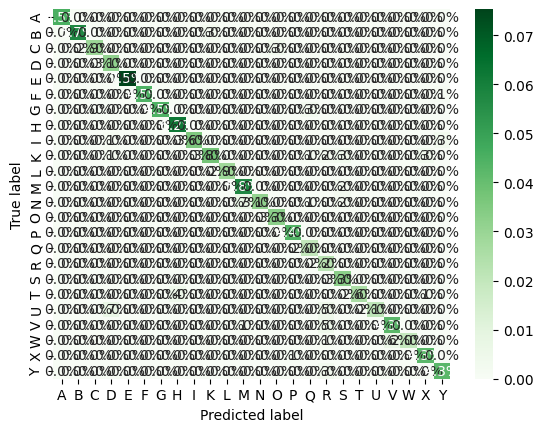

In [43]:
import seaborn as sns

# Get the true labels and predicted labels
y_true = []
y_pred = []
for x, y in val_path:
    y_true.extend(y.numpy())
    y_pred.extend(tf.argmax(model.predict(x), axis=-1).numpy())

# Generate the confusion matrix
cm = tf.math.confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix
cm_norm = cm / tf.reduce_sum(cm)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, cmap='Greens', annot=True, fmt='.1%', xticklabels=name_train, yticklabels=name_train)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

**Confusion matrix and Classification: True vs. False and Positive vs. Negative**

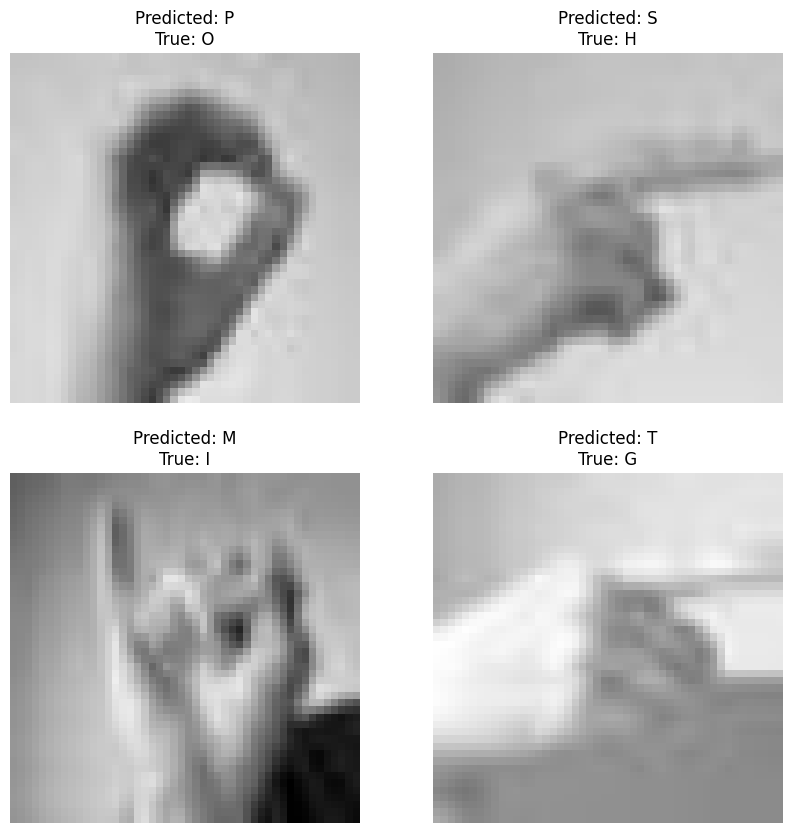

In [44]:
from sklearn.metrics import confusion_matrix
import itertools


# Display some images and their predicted labels alongside the true labels
plt.figure(figsize=(10, 10))
for images, labels in val_path.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    predicted_label = name_train[y_pred[i]]
    true_label = name_train[labels[i]]
    plt.title(f"Predicted: {predicted_label}\nTrue: {true_label}")
    plt.axis("off")